In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# import joblib
# import gradio as gr
import warnings
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv("waste management.csv")
df.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [61]:
X = df[['waste_type',
        'material_composition',
        'recycling_potential',
        'toxicity_level']]

y = df['management_strategy']


In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred_R=model.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred_R)

0.9

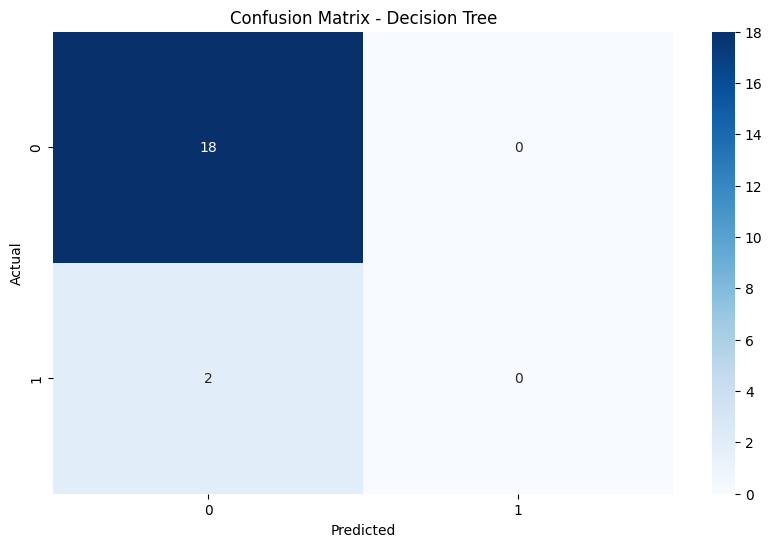

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



In [69]:
cm_dt=confusion_matrix(y_test,y_pred_R)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_R))

In [70]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred_D=model1.predict(x_test)
accuracy_score(y_test,y_pred_D)

0.95

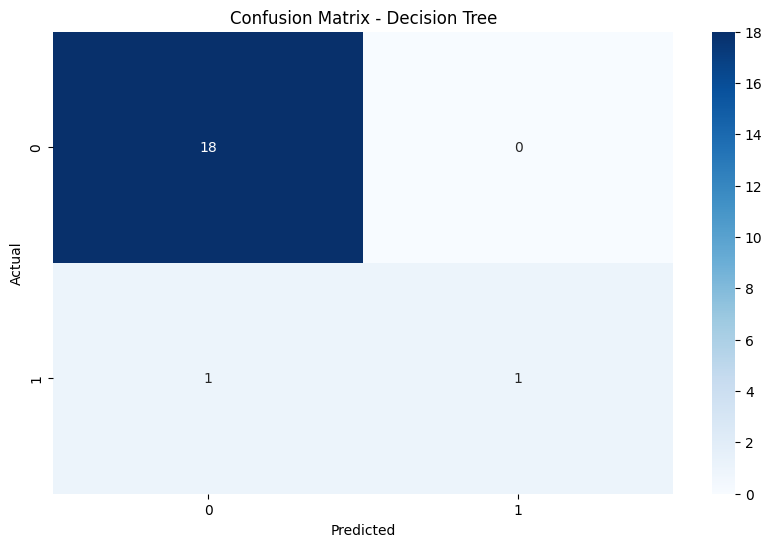

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



In [71]:
cm_dt=confusion_matrix(y_test,y_pred_D)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_D))

In [72]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred_RE=model2.predict(x_test)
accuracy_score(y_test,y_pred_RE)

0.9

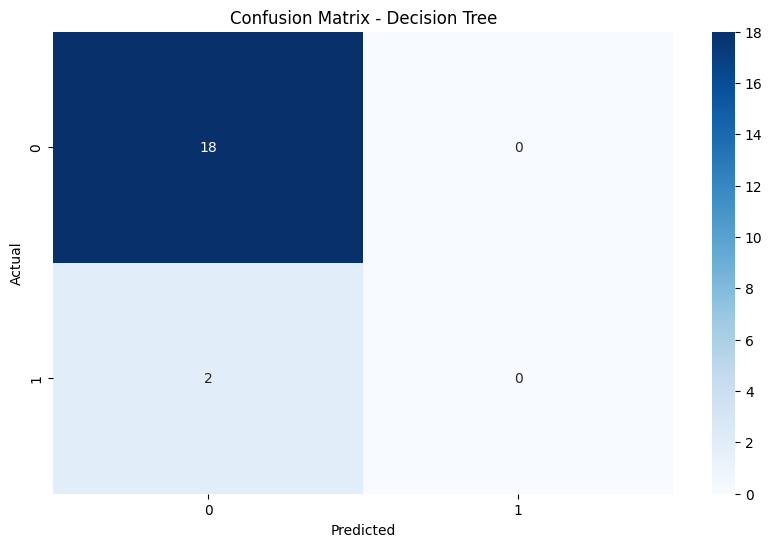

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



In [73]:
cm_dt=confusion_matrix(y_test,y_pred_RE)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_RE))

In [74]:
model3=SVC()
model3.fit(x_train,y_train)
y_pred_S=model3.predict(x_test)
accuracy_score(y_test,y_pred_S)

0.9

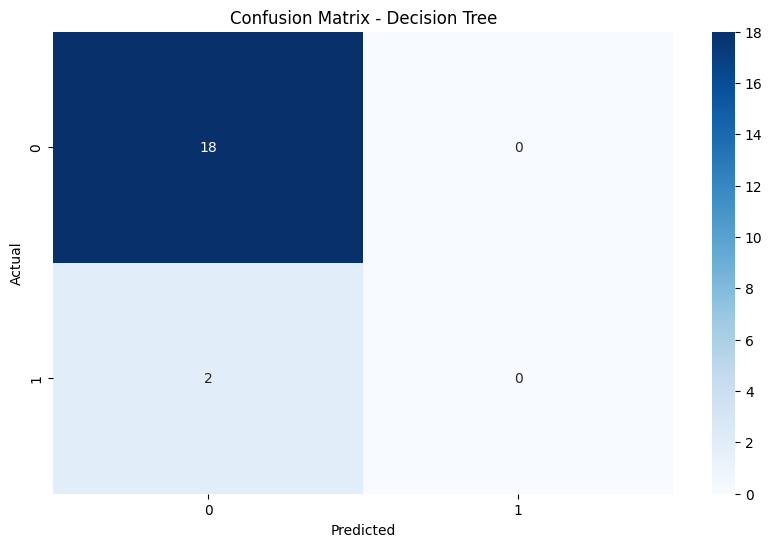

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



In [75]:
cm_dt=confusion_matrix(y_test,y_pred_S)
plt.figure(figsize=(10,6))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_pred_S))

In [86]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [87]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np


In [88]:
joblib.dump(scaler, 'waste_management_model.joblib')
print("Scaler saved as ''waste_management_model.joblib'")

Scaler saved as ''waste_management_model.joblib'


In [90]:
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as 'scaler.joblib'.")

Scaler saved as 'scaler.joblib'.


In [97]:
model=joblib.load('waste_management_model.joblib')

In [98]:
def predict_management_strategy(waste_type, material_composition, recycling_potential, toxicity_level):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([{
        'waste_type': [waste_type],
        'material_composition': [material_composition],
        'recycling_potential': [recycling_potential],
        'toxicity_level': [toxicity_level]
    }])
    prediction=model.predict(input_data)[0]
    if prediction==0:
     return 'Non-Recyclable'
    else:
      return 'Recyclabe'



In [100]:
waste_type_input= gr.Slider(minimum=1,maximum=3,step=1,label='Waste Type(1-3)')
matrial_composition_input=gr.Slider(minimum=0.0, maximum=1.0,step=0.01,label='Material Composition(0-1)')
recycling_potential_input=gr.Slider(minimum=0.0, maximum=1.0,step=0.01,label='Recycling Potential(0-1)')
toxicity_level_input=gr.Slider(minimum=0.0, maximum=100.0,step=0.1,label='Toxicity Level(0-100)')

interface = gr.Interface(
    fn=predict_management_strategy,
    inputs=[
        waste_type_input,
        matrial_composition_input,
        recycling_potential_input,
        toxicity_level_input
    ],
    outputs='text',
    title='Waste Management Strategy Predictor',
    description='Enter the waste characteristics to predict the management strategy (Non-Recyclable or Recyclable).'
)
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0b01fd2ffaebf7ef27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
